In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train) , (X_test, y_test) = cifar10.load_data() # data setin indirilmesi

170498071/170498071 [==============================] - 77s 0us/step


In [4]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [6]:
X_train[0].shape

(32, 32, 3)

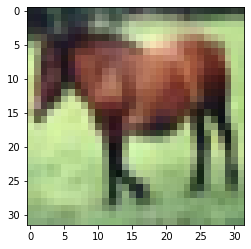

In [10]:
plt.imshow(X_train[7])  #örneklem

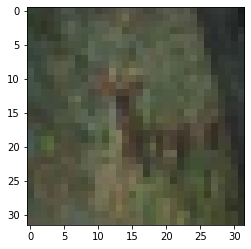

In [9]:
plt.imshow(X_train[10])

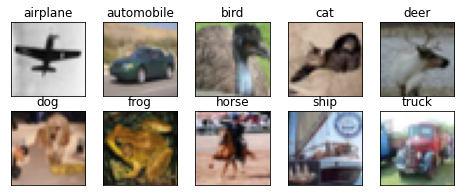

In [21]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = 10

fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(y_train[:]==i)[0]
    features_idx = X_train[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = (features_idx[img_num,::])
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show() #Kategorilerde yer alan resim verileri

In [12]:
X_train = X_train/255

In [13]:
X_test = X_test/255

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_dog_train  = to_categorical(y_train, 10)

In [16]:
y_dog_test = to_categorical(y_test, 10)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [18]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Conv2D(filters = 64, kernel_size = (4,4), input_shape = (32, 32, 3), activation = "relu"))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(512, activation = "relu"))
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 29, 29, 32)        1568      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 512)               8

In [22]:
from tensorflow.keras.callbacks import EarlyStopping

In [23]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 2)

In [26]:
model.fit(X_train, y_dog_train, validation_data = (X_test, y_dog_test), epochs = 15, callbacks = [early_stop])

Epoch 1/15
1563/1563 [==============================] - 51s 31ms/step - loss: 1.5502 - accuracy: 0.4316 - val_loss: 1.3075 - val_accuracy: 0.5261
Epoch 2/15
1563/1563 [==============================] - 48s 31ms/step - loss: 1.1848 - accuracy: 0.5778 - val_loss: 1.1525 - val_accuracy: 0.5867
Epoch 3/15
1563/1563 [==============================] - 45s 29ms/step - loss: 1.0058 - accuracy: 0.6479 - val_loss: 1.0633 - val_accuracy: 0.6282
Epoch 4/15
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8670 - accuracy: 0.6977 - val_loss: 0.9839 - val_accuracy: 0.6616
Epoch 5/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7482 - accuracy: 0.7375 - val_loss: 1.1080 - val_accuracy: 0.6375
Epoch 6/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6430 - accuracy: 0.7753 - val_loss: 1.0197 - val_accuracy: 0.6679


In [27]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.550189,0.43162,1.307456,0.5261
1,1.184824,0.57780,1.152459,0.5867
2,1.005842,0.64792,1.063292,0.6282
3,0.866999,0.69766,0.983855,0.6616
4,0.748249,0.73752,1.107969,0.6375
5,0.643034,0.77534,1.019704,0.6679


<AxesSubplot:>

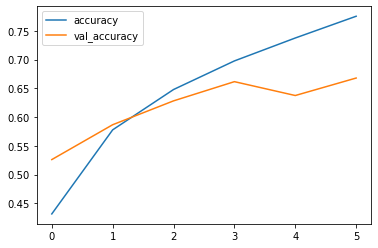

In [28]:
metrics[["accuracy", "val_accuracy"]].plot()

<AxesSubplot:>

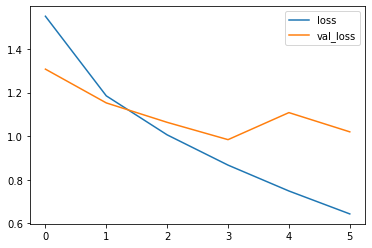

In [29]:
metrics[["loss", "val_loss"]].plot()